# Support Vector Regression

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# From: https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8
import timesplit as ts

## Set up helper functions

In [2]:
def GridSearchSummary(search, hyperparams, metrics, file):
    """
    Creates a dataframe with summary results from GridSearchCV
    search - the final GridSearchCV object
    hyperparams - the list of parameters you were tuning for (aka keys in the param_grid dictionary)
    metrics - the list of scoring metrics you used
    file - filename of where you want to save your results
    """
    
    summary = pd.DataFrame()
    
    for hyperparam in hyperparams:
        col = [dct[hyperparam] for dct in search.cv_results_["params"]]
        summary[hyperparam] = col
    
    for metric in metrics:
        col = search.cv_results_["mean_test_" + metric]
        summary[metric] = col
    
    summary.to_csv(file)
    
    return summary

## Import data

In [3]:
X_train = pd.read_csv("../Data/Train-Test Set/X_train.csv", parse_dates=["date"])
y_train = pd.read_csv("../Data/Train-Test Set/y_train.csv")

X_test = pd.read_csv("../Data/Train-Test Set/X_test.csv", parse_dates=["date"])
y_test = pd.read_csv("../Data/Train-Test Set/y_test.csv")

## Get indices for time-based cross validation

In [4]:
# set up time-based CV indices
tscv = ts.TimeBasedCV(train_period=21,
                      test_period=7,
                      freq='days')

tscv_indices = []

for train_index, test_index in tscv.split(X_train, date_column='date'):
    tscv_indices.append((train_index, test_index))

## Run GridSearchCV using Support Vector Regression

In [5]:
# define scoring metrics
scoring_metrics = ["neg_mean_squared_error", "r2", "neg_mean_absolute_error"]

In [6]:
param_grid = {
    'kernel': ["linear", "rbf"],
    'C': [0.5, 1, 5, 10, 20],
    'epsilon': [0, 5, 10]
}

print("Start: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

SVR_search_pt1 = GridSearchCV(svm.SVR(), param_grid, cv=tscv_indices, scoring=scoring_metrics, refit = False, verbose=2)
SVR_search_pt1.fit(X_train.drop(columns=["date"]), np.array(y_train).ravel())

print("End: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Start:  02/06/2021 14:50:21
Fitting 39 folds for each of 30 candidates, totalling 1170 fits
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.7s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.3s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.3s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.3s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ....................C=0.5, epsilon=0, kernel=linear; total time=   1.2s
[CV] END ........

[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ....................C=0.5, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ...................

[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.5s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.5s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   1.0s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   1.1s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   1.0s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   1.0s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.9s
[CV] END ......................C=0.5, epsilon=10, kernel=rbf; total time=   0.9s
[CV] END ...................

[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.6s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.2s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.2s
[CV] END .........................C=1, epsilon=0, kernel=rbf; total time=   2.5s
[CV] END ......................C=1, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ......................C=1, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ......................C=1, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ......................C=1, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ......................C=1, epsilon=5, kernel=linear; total time=   0.3s
[CV] END ...................

[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.3s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.2s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.2s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.2s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.1s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ...................

[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.7s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.6s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.3s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.6s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   3.2s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   3.0s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   3.1s
[CV] END .........................C=5, epsilon=0, kernel=rbf; total time=   2.9s
[CV] END ...................

[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.3s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.3s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.3s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END .........................C=5, epsilon=5, kernel=rbf; total time=   0.6s
[CV] END ...................

[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.0s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.2s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.4s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.8s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.6s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.7s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.5s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.2s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.9s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   3.4s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.9s
[CV] END .....................C=10, epsilon=0, kernel=linear; total time=   2.3s
[CV] END ...................

[CV] END .....................C=10, epsilon=5, kernel=linear; total time=   0.3s
[CV] END .....................C=10, epsilon=5, kernel=linear; total time=   0.2s
[CV] END .....................C=10, epsilon=5, kernel=linear; total time=   0.2s
[CV] END .....................C=10, epsilon=5, kernel=linear; total time=   0.2s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.4s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END ........................C=10, epsilon=5, kernel=rbf; total time=   0.5s
[CV] END ...................

[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.6s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.5s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.4s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.3s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.3s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=10, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END ...................

[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.5s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.5s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.6s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.6s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.6s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   0.7s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.0s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.3s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.8s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.7s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.5s
[CV] END .....................C=20, epsilon=5, kernel=linear; total time=   1.5s
[CV] END ...................

[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.3s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END ....................C=20, epsilon=10, kernel=linear; total time=   0.2s
[CV] END .......................C=20, epsilon=10, kernel=rbf; total time=   0.3s
[CV] END .......................C=20, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END .......................C=20, epsilon=10, kernel=rbf; total time=   0.2s
[CV] END ...................

In [29]:
SVR_summary_pt1 = GridSearchSummary(SVR_search_pt1, 
                  ["kernel", "C", "epsilon"],
                  scoring_metrics,
                  "../model_outputs/SVR_search_pt1.csv")

SVR_summary_pt1.sort_values(by=["neg_mean_absolute_error"])

,kernel,C,epsilon,neg_mean_squared_error,r2,neg_mean_absolute_error
5,rbf,0.5,10,-15295.674762,0.197061,-21.136350
11,rbf,1.0,10,-14594.057973,0.242700,-19.440992
3,rbf,0.5,5,-15342.480529,0.196476,-19.210134
1,rbf,0.5,0,-15382.445078,0.191414,-18.290143
9,rbf,1.0,5,-14649.589170,0.242344,-17.583607
7,rbf,1.0,0,-14701.425222,0.237910,-16.607469
17,rbf,5.0,10,-13067.981161,0.345840,-16.449062
23,rbf,10.0,10,-12448.026284,0.392792,-15.574690
29,rbf,20.0,10,-11729.829038,0.458734,-14.757704
15,rbf,5.0,5,-13107.188687,0.347771,-14.494073


In [8]:
param_grid = {
    'kernel': ["poly"],
    'degree': [2, 3],
    'C': [0.5, 1, 5, 10, 20],
    'epsilon': [0, 5, 10]
}

print("Start: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

SVR_search_pt2 = GridSearchCV(svm.SVR(), param_grid, cv=tscv_indices, scoring=scoring_metrics, refit = False, verbose=2)
SVR_search_pt2.fit(X_train.drop(columns=["date"]), np.array(y_train).ravel())

print("End: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Start:  02/06/2021 15:13:30
Fitting 39 folds for each of 30 candidates, totalling 1170 fits
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.4s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.5s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.4s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.4s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.6s
[CV] END ............C=0.5, degree=2, epsilon=0, kernel=poly; total time=   1.4s
[CV] END ........

[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ...........C=0.5, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ...........C=0.5, d

[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   0.7s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.0s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.0s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.0s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.0s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.1s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.1s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   1.1s
[CV] END ...........C=0.5, degree=3, epsilon=10, kernel=poly; total time=   0.9s
[CV] END ...........C=0.5, d

[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.5s
[CV] END ..............C=1, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END .............C=1, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END .............C=1, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END .............C=1, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END .............C=1, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END .............C=1, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END .............C=1, d

[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.2s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.3s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.3s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.3s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.5s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.4s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.0s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.1s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.0s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   1.0s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=1, degree=3, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=1, 

[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.5s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.5s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.6s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.7s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.9s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   0.9s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   1.0s
[CV] END ..............C=5, degree=2, epsilon=5, kernel=poly; total time=   1.1s
[CV] END ..............C=5, 

[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   2.0s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.8s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   2.1s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.5s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.6s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.6s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.8s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.9s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.6s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.6s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   1.7s
[CV] END ..............C=5, degree=3, epsilon=0, kernel=poly; total time=   2.0s
[CV] END ..............C=5, 

[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.2s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.4s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, degree=2, epsilon=0, kernel=poly; total time=   1.3s
[CV] END .............C=10, 

[CV] END ............C=10, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ............C=10, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ............C=10, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END ............C=10, degree=2, epsilon=10, kernel=poly; total time=   0.3s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   3.1s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.9s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.4s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.2s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.6s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.1s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.1s
[CV] END .............C=10, degree=3, epsilon=0, kernel=poly; total time=   2.1s
[CV] END .............C=10, 

[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   1.5s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   1.4s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   2.4s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   1.2s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.9s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   1.5s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.9s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ............C=10, degree=3, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ............C=10, d

[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.4s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.5s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.7s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.1s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   0.8s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.2s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.2s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.2s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.3s
[CV] END ............C=20, degree=2, epsilon=10, kernel=poly; total time=   1.2s
[CV] END ............C=20, d

[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.6s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.3s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   2.3s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.0s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.3s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.4s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   4.0s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.4s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   1.2s
[CV] END .............C=20, degree=3, epsilon=5, kernel=poly; total time=   0.9s
[CV] END ............C=20, degree=3, epsilon=10, kernel=poly; total time=   0.6s
[CV] END ............C=20, degree=3, epsilon=10, kernel=poly; total time=   0.8s
[CV] END ............C=20, d

In [30]:
SVR_summary_pt2 = GridSearchSummary(SVR_search_pt2, 
                  ["kernel", "degree", "C", "epsilon"],
                  scoring_metrics,
                  "../model_outputs/SVR_search_pt2.csv")

SVR_summary_pt2.sort_values(by=["neg_mean_absolute_error"])

,kernel,degree,C,epsilon,neg_mean_squared_error,r2,neg_mean_absolute_error
29,poly,3,20.0,10,-198951.200279,-5.564182,-27.027581
28,poly,3,20.0,5,-223693.070571,-6.227481,-26.459804
27,poly,3,20.0,0,-230259.591016,-6.708395,-26.452374
23,poly,3,10.0,10,-104708.601797,-3.130368,-24.409600
22,poly,3,10.0,5,-125659.894464,-3.600083,-23.902685
21,poly,3,10.0,0,-128499.041859,-3.745055,-23.865229
17,poly,3,5.0,10,-48535.013775,-1.665412,-22.244895
5,poly,3,0.5,10,-21801.884281,-0.280848,-21.393676
11,poly,3,1.0,10,-25391.724092,-0.605051,-21.332133
16,poly,3,5.0,5,-51479.551779,-1.714932,-21.255104


In [10]:
SVR_summary = pd.concat([SVR_summary_pt1, SVR_summary_pt2])
SVR_summary.sort_values(by=["r2"], ascending = False)

,kernel,C,epsilon,neg_mean_squared_error,r2,neg_mean_absolute_error,degree
24,linear,20.0,0,-1146.115604,0.944115,-7.114552,NaN
18,linear,10.0,0,-1143.512250,0.943788,-7.122716,NaN
26,linear,20.0,5,-1163.562142,0.943564,-7.432677,NaN
12,linear,5.0,0,-1140.235654,0.943214,-7.145574,NaN
20,linear,10.0,5,-1166.835814,0.942773,-7.464566,NaN
14,linear,5.0,5,-1165.288425,0.941741,-7.507947,NaN
28,linear,20.0,10,-1198.125355,0.940145,-8.240562,NaN
6,linear,1.0,0,-1090.439460,0.939908,-7.251088,NaN
22,linear,10.0,10,-1208.416240,0.939792,-8.286439,NaN
16,linear,5.0,10,-1205.070646,0.938377,-8.370403,NaN


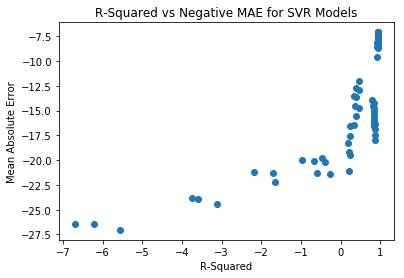

In [40]:
import matplotlib.pyplot as plt 

plt.scatter(SVR_summary['r2'], SVR_summary['neg_mean_absolute_error'])
plt.xlabel("R-Squared")
plt.ylabel("Mean Absolute Error")
plt.title("R-Squared vs Negative MAE for SVR Models")
plt.show()

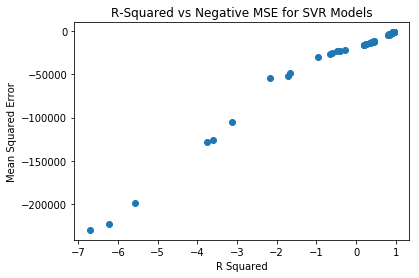

In [41]:
plt.scatter(SVR_summary['r2'], SVR_summary['neg_mean_squared_error'])
#plt.xlim([0,1])
#plt.ylim([-4500, -3500])
plt.xlabel("R Squared")
plt.ylabel("Mean Squared Error")
plt.title("R-Squared vs Negative MSE for SVR Models")
plt.show()

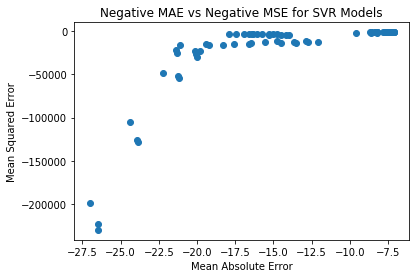

In [42]:
plt.scatter(SVR_summary['neg_mean_absolute_error'], SVR_summary['neg_mean_squared_error'])
plt.xlabel("Mean Absolute Error")
plt.ylabel("Mean Squared Error")
plt.title("Negative MAE vs Negative MSE for SVR Models")
plt.show()

## Run GridSearchCV using LinearSVR

In [16]:
# define scoring metrics
scoring_metrics = ["neg_mean_squared_error", "r2", "neg_mean_absolute_error"]

In [17]:
from sklearn.pipeline import make_pipeline

param_grid = {
    'C': [0.1, 0.5, 1, 5, 10, 20],
    'epsilon': [0, 5, 10]
}

print("Start: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

linSVR_search = GridSearchCV(svm.LinearSVR(max_iter=100000), param_grid, cv=tscv_indices, 
                             scoring=scoring_metrics, refit = False, verbose=2)
linSVR_search.fit(X_train.drop(columns=["date"]), np.array(y_train).ravel())

print("End: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Start:  02/06/2021 15:39:44
Fitting 39 folds for each of 18 candidates, totalling 702 fits
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END ...................................C=0.1, epsilon=0; total time=   0.0s
[CV] END .........

[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.1, epsilon=10; total time=   0.1s
[CV] END ...................

[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.1s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ..................................C=0.5, epsilon=10; total time=   0.0s
[CV] END ...................

[CV] END .....................................C=1, epsilon=5; total time=   0.1s
[CV] END .....................................C=1, epsilon=5; total time=   0.1s
[CV] END .....................................C=1, epsilon=5; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.0s
[CV] END ....................................C=1, epsilon=10; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.0s
[CV] END ....................................C=1, epsilon=10; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.1s
[CV] END ....................................C=1, epsilon=10; total time=   0.0s
[CV] END ....................................C=1, epsilon=10; total time=   0.0s
[CV] END ...................

[CV] END .....................................C=5, epsilon=5; total time=   0.1s
[CV] END .....................................C=5, epsilon=5; total time=   0.3s
[CV] END .....................................C=5, epsilon=5; total time=   0.3s
[CV] END .....................................C=5, epsilon=5; total time=   0.4s
[CV] END .....................................C=5, epsilon=5; total time=   0.5s
[CV] END .....................................C=5, epsilon=5; total time=   0.2s
[CV] END .....................................C=5, epsilon=5; total time=   0.2s
[CV] END .....................................C=5, epsilon=5; total time=   0.3s
[CV] END .....................................C=5, epsilon=5; total time=   0.3s
[CV] END .....................................C=5, epsilon=5; total time=   0.1s
[CV] END .....................................C=5, epsilon=5; total time=   0.2s
[CV] END .....................................C=5, epsilon=5; total time=   0.3s
[CV] END ...................

[CV] END ....................................C=10, epsilon=5; total time=   0.2s
[CV] END ....................................C=10, epsilon=5; total time=   0.1s
[CV] END ....................................C=10, epsilon=5; total time=   0.4s
[CV] END ....................................C=10, epsilon=5; total time=   0.3s
[CV] END ....................................C=10, epsilon=5; total time=   0.2s
[CV] END ....................................C=10, epsilon=5; total time=   0.3s
[CV] END ....................................C=10, epsilon=5; total time=   0.5s
[CV] END ....................................C=10, epsilon=5; total time=   1.0s
[CV] END ....................................C=10, epsilon=5; total time=   0.4s
[CV] END ....................................C=10, epsilon=5; total time=   0.7s
[CV] END ....................................C=10, epsilon=5; total time=   0.4s
[CV] END ....................................C=10, epsilon=5; total time=   0.7s
[CV] END ...................

[CV] END ....................................C=20, epsilon=0; total time=   0.6s
[CV] END ....................................C=20, epsilon=0; total time=   2.4s
[CV] END ....................................C=20, epsilon=0; total time=   2.6s
[CV] END ....................................C=20, epsilon=0; total time=   1.0s
[CV] END ....................................C=20, epsilon=0; total time=   1.1s
[CV] END ....................................C=20, epsilon=0; total time=   1.4s
[CV] END ....................................C=20, epsilon=0; total time=   4.7s
[CV] END ....................................C=20, epsilon=0; total time=   2.1s
[CV] END ....................................C=20, epsilon=5; total time=   0.9s
[CV] END ....................................C=20, epsilon=5; total time=   1.0s
[CV] END ....................................C=20, epsilon=5; total time=   0.4s
[CV] END ....................................C=20, epsilon=5; total time=   0.5s
[CV] END ...................

Some of the above specifications do not converge well...

In [31]:
linSVR_summary = GridSearchSummary(linSVR_search, 
                  ["epsilon", "C"],
                  scoring_metrics,
                  "../model_outputs/linSVR_search.csv")

In [19]:
linSVR_summary.sort_values(by=["r2"], ascending=False)

,epsilon,C,neg_mean_squared_error,r2,neg_mean_absolute_error
15,0,20.0,-1146.295621,0.944082,-7.115797
12,0,10.0,-1146.015146,0.943826,-7.120604
16,5,20.0,-1165.087959,0.943531,-7.426578
9,0,5.0,-1139.061059,0.943096,-7.142153
13,5,10.0,-1166.668852,0.942773,-7.451857
10,5,5.0,-1164.038938,0.941775,-7.489274
17,10,20.0,-1192.132991,0.940344,-8.190558
14,10,10.0,-1204.766001,0.940036,-8.222697
6,0,1.0,-1078.422682,0.939882,-7.239326
11,10,5.0,-1197.384687,0.938963,-8.246657


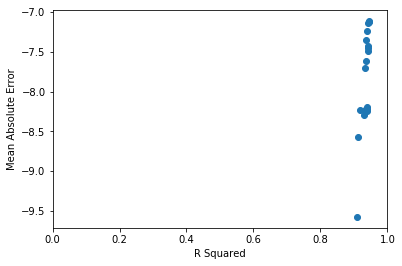

In [20]:
plt.scatter(linSVR_summary['r2'], linSVR_summary['neg_mean_absolute_error'])
plt.xlim([0,1])
plt.xlabel("R Squared")
plt.ylabel("Mean Absolute Error")
plt.show()

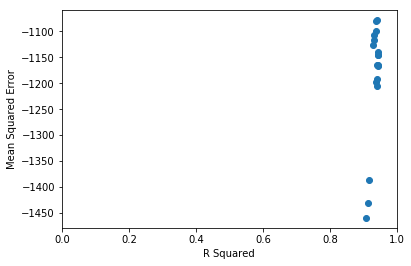

In [21]:
plt.scatter(linSVR_summary['r2'], linSVR_summary['neg_mean_squared_error'])
plt.xlim([0,1])
plt.xlabel("R Squared")
plt.ylabel("Mean Squared Error")
plt.show()

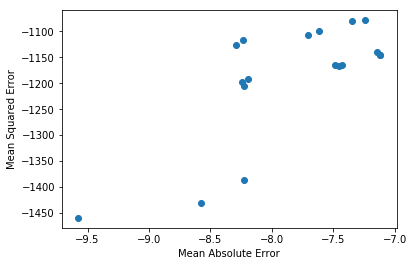

In [22]:
plt.scatter(linSVR_summary['neg_mean_absolute_error'], linSVR_summary['neg_mean_squared_error'])
plt.xlabel("Mean Absolute Error")
plt.ylabel("Mean Squared Error")
plt.show()

In [32]:
linSVR_summary = pd.read_csv("../model_outputs/linSVR_search.csv")
SVR_summary1 = pd.read_csv("../model_outputs/SVR_search_pt1.csv")
SVR_summary2 = pd.read_csv("../model_outputs/SVR_search_pt2.csv")

In [33]:
linSVR_summary["model"] = "LinearSVR"
SVR_summary1["model"] = "SVR"
SVR_summary2["model"] = "SVR"

SVR_summary = pd.concat([SVR_summary1, SVR_summary2, linSVR_summary, ])
SVR_summary = SVR_summary.drop(columns="Unnamed: 0")

In [34]:
SVR_summary.sort_values("neg_mean_absolute_error", ascending=False)

,kernel,C,epsilon,neg_mean_squared_error,r2,neg_mean_absolute_error,model,degree
24,linear,20.0,0,-1146.115604,0.944115,-7.114552,SVR,NaN
15,NaN,20.0,0,-1146.295621,0.944082,-7.115797,LinearSVR,NaN
12,NaN,10.0,0,-1146.015146,0.943826,-7.120604,LinearSVR,NaN
18,linear,10.0,0,-1143.512250,0.943788,-7.122716,SVR,NaN
9,NaN,5.0,0,-1139.061059,0.943096,-7.142153,LinearSVR,NaN
...,...,...,...,...,...,...,...,...
22,poly,10.0,5,-125659.894464,-3.600083,-23.902685,SVR,3.0
23,poly,10.0,10,-104708.601797,-3.130368,-24.409600,SVR,3.0
27,poly,20.0,0,-230259.591016,-6.708395,-26.452374,SVR,3.0
28,poly,20.0,5,-223693.070571,-6.227481,-26.459804,SVR,3.0


In [35]:
SVR_summary.to_csv("../model_outputs/SVR_summary_all.csv")